In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
contador = 1
def teste(row):
    global contador
    if (row['Switch'] == 'HW'):
        return contador
    else:
        retorno = contador
        contador += 1
        return retorno

In [3]:
df = pd.read_table("../Saidas/Teste2/info_parimpar.txt", sep=" ")
df["Medicao"] = df.apply (teste, axis=1)
#df.reset_index().set_index('index', drop=False)
df

,Tempo,Switch,RegrasInstaladas,RegrasAceitas,RegrasBloqueadas,BytesEnviados,Medicao
0,15,HW,22,100,596,39002040,1
1,15,SW,115,584,0,223499304,1
2,30,HW,41,178,758,171379152,2
3,31,SW,141,705,0,958589856,2
4,46,HW,54,230,758,421365672,3
5,46,SW,154,769,0,2252111904,3
6,61,HW,60,262,758,818294400,4
7,61,SW,165,794,0,4092007248,4
8,76,HW,63,274,758,1370853288,5
9,76,SW,157,812,0,6333988752,5


In [4]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

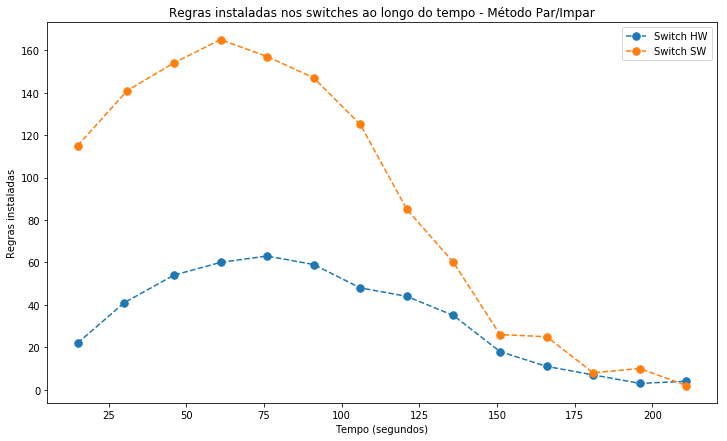

In [5]:
#Agrupando por switch
groups = df.groupby (['Switch'])
#for key,item in gpb:
    #print(gpb.get_group(key), "\n\n")

# Plot
fig, ax = plt.subplots(figsize = (12,7))
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Tempo, group.RegrasInstaladas, marker='.', linestyle='--', ms=15, label="Switch "+name, alpha=1)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Regras instaladas')
plt.title(u"Regras instaladas nos switches ao longo do tempo - Método Par/Impar") #u = unicode
ax.legend()
plt.savefig('regrasInstaladas_Tempo_ParImpar.pdf')
plt.show()